In [ ]:
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import os
#from google.colab import drive

 
#drive.mount('/content/drive')
 
#data_root = '/content/drive/MyDrive/Colab Notebooks/cardio'
#os.environ['DATA_ROOT'] = data_root
 
#print('Data root:', data_root)
#print('Data root contains:', os.listdir(data_root))

# Чтение, обработка и исследование данных

In [ ]:
data = pd.read_csv('cardio_train.csv',sep = r';')
data = data.drop(columns='id')
data.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [ ]:
data.duplicated().sum() # Удаление повторяющихся значений

24

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
from scipy.stats import shapiro
stat,p = shapiro(data['age'])#p-value 0, возраст не распределен нормально
p

0.0

In [ ]:
data['age'] = round(data['age']/365.25) # Заменим возраст на возраст в годах
bmi = data['weight']/((data['height']/100.0)**2) # Новый столбец - индекс массы тела
data.insert(4,'bmi',bmi)

Посмотрим на сами значения

In [ ]:
data.describe()

,age,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,53.303404,1.349648,164.359152,74.208519,27.557610,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,6.760509,0.476862,8.211218,14.397211,6.092210,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,30.000000,1.000000,55.000000,10.000000,3.471784,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,23.875115,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,26.391837,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,30.222222,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,298.666667,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


По минимальному росту и весу видно, что в данных есть ошибки (или по крайней мере нетипичные значения), также давление не должно быть отрицательным. Удалим для начала значения давления меньше 1.

In [ ]:
data = data.drop(data[(data['ap_hi'] <=1) | (data['ap_lo'] <=1)] .index)

Удалим записи, в которых ap_hi меньше ap_lo

In [ ]:
data = data.drop(data[(data['ap_hi'] <= data['ap_lo'])] .index)

По примерно логичным значениям ИМТ и давления посмотрим сколько данных им не соответствуют.

In [ ]:
data[(data['bmi']>=70) | (data['bmi'] <= 10) | (data['ap_hi'] >= 200) | (data['ap_lo'] >= 200)]

,age,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
224,60.0,2,76,55.0,95.221607,120,80,1,1,0,0,1,0
1328,58.0,2,174,106.0,35.011230,220,120,3,3,0,0,1,0
1876,41.0,1,160,60.0,23.437500,902,60,1,1,0,0,1,0
2278,62.0,1,156,101.0,41.502301,220,110,1,2,0,0,0,1
3420,40.0,1,100,70.0,70.000000,100,70,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68448,42.0,2,179,100.0,31.210012,200,140,1,2,1,0,1,1
68579,54.0,2,171,71.0,24.280975,220,110,2,1,0,0,1,1
69329,54.0,1,145,62.0,29.488704,240,130,1,1,0,0,0,1
69370,40.0,1,170,74.0,25.605536,2000,100,2,1,0,0,1,1


Посмотрим сколько данных выходят за три сигмы по значениям ИМТ и давления. Код вычисляет z-оценку по ИМТ и давлению и выводит строки, в которых хотя бы в одном из этих столбцов значение выходит за 3 сигмы.

In [ ]:
from scipy import stats
data[(np.abs(stats.zscore(data[['bmi','ap_hi','ap_lo']])) > 3)]

,age,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
83,54.0,1,152,110.0,47.610803,160,90,1,1,0,0,1,1
97,50.0,1,165,99.0,36.363636,150,110,1,1,0,0,0,1
115,60.0,2,160,57.0,22.265625,170,110,1,1,0,0,1,1
224,60.0,2,76,55.0,95.221607,120,80,1,1,0,0,1,0
296,57.0,2,169,76.0,26.609713,170,110,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69511,55.0,1,167,65.0,23.306680,170,110,3,1,0,0,1,1
69587,64.0,1,169,101.0,35.362907,180,110,1,1,0,0,0,1
69708,58.0,1,144,115.0,55.459105,140,90,1,1,0,1,0,1
69929,54.0,1,164,85.0,31.603212,165,110,3,3,0,0,1,1


Удалим все значения которые выходят за три сигмы.



In [ ]:
data = data.drop(data[(np.abs(stats.zscore(data[['bmi','ap_hi','ap_lo']])) > 3)].index)
data.describe()

,age,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67452.000000,67452.000000,67452.000000,67452.000000,67452.000000,67452.000000,67452.000000,67452.000000,67452.000000,67452.000000,67452.000000,67452.000000,67452.000000
mean,53.284810,1.349493,164.471921,73.701459,27.271285,126.219712,81.008080,1.360330,1.223107,0.087840,0.053015,0.803371,0.490527
std,6.766849,0.476813,7.829257,13.562801,4.867142,16.039267,8.814358,0.675733,0.569149,0.283065,0.224066,0.397452,0.499914
min,30.000000,1.000000,120.000000,23.000000,9.331007,80.000000,53.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,23.874536,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,26.264944,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,30.078125,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,165.000000,45.724737,401.000000,109.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Корреляция Пирсона между признаками, целевой переменной.

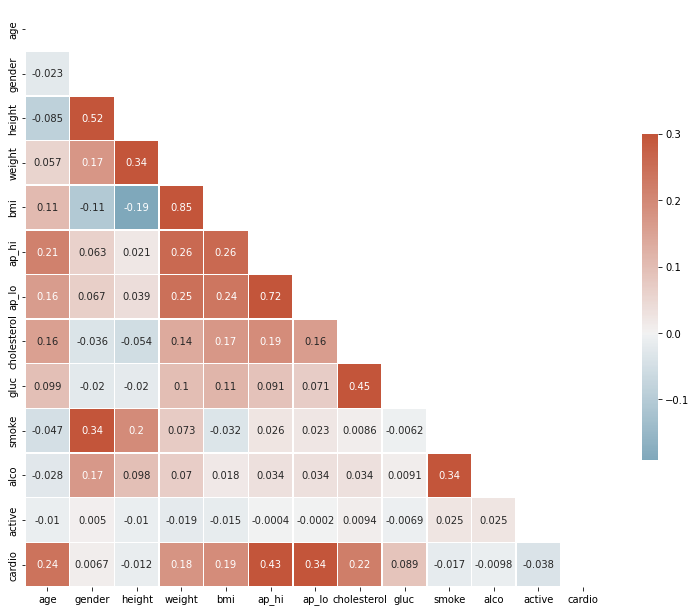

In [ ]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(13, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

Распределение по полу

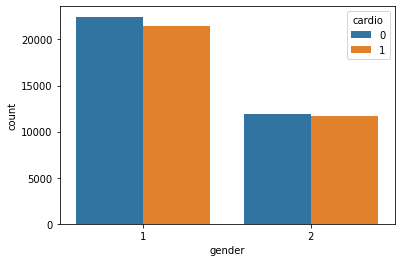

In [ ]:
sns.countplot(data=data,x='gender',hue='cardio')

Распределение целевой переменной по ИМТ

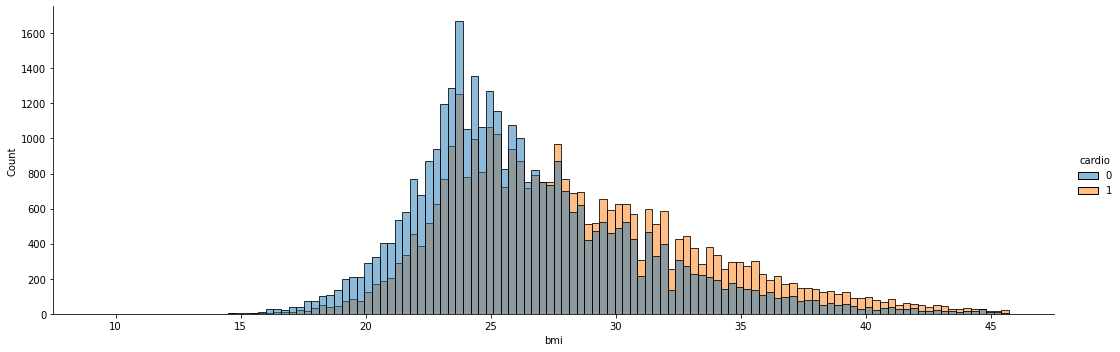

In [ ]:
sns.displot(data=data,x='bmi',hue='cardio',aspect=3,)

Распределение болезней по возрасту

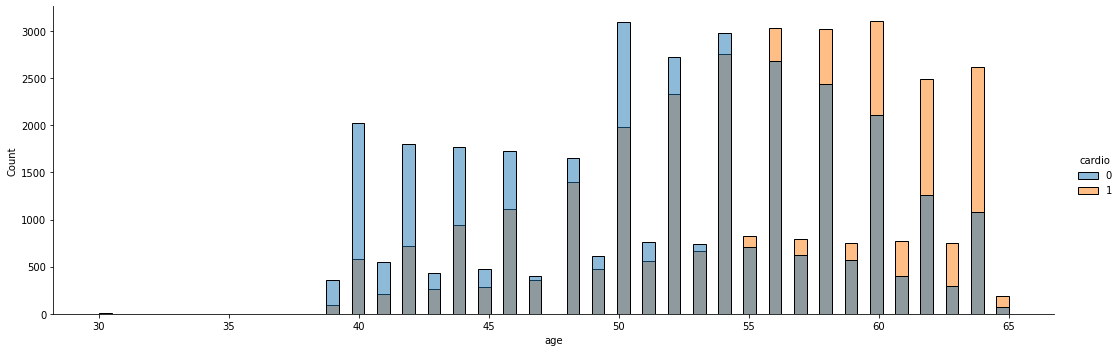

In [ ]:
sns.displot(data=data,x='age',hue='cardio',aspect=3)

Распределение целевой переменной

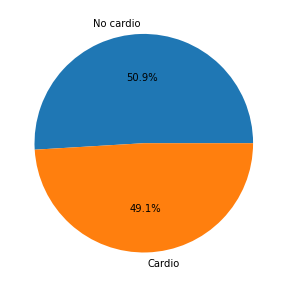

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
plt.tight_layout(pad=10)
ax.pie(x=data['cardio'].value_counts(), labels=['No cardio','Cardio'],autopct='%1.1f%%')
plt.show()

# Работа с данными и обучение моделей

In [ ]:
df = data.copy()

Добавим категориальное значение ИМТ

In [ ]:
df.loc[(data['bmi'] < 18.5),'cat_bmi'] = 'under'
df.loc[(data['bmi'] >= 18.5) & (data['bmi'] < 25) ,'cat_bmi'] = 'healthy'
df.loc[(data['bmi'] >= 25) & (data['bmi'] < 30) ,'cat_bmi']= 'over'
df.loc[(data['bmi'] >= 30), 'cat_bmi'] = 'obese'
df.head()

,age,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,cat_bmi
0,50.0,2,168,62.0,21.967120,110,80,1,1,0,0,1,0,healthy
1,55.0,1,156,85.0,34.927679,140,90,3,1,0,0,1,1,obese
2,52.0,1,165,64.0,23.507805,130,70,3,1,0,0,0,1,healthy
3,48.0,2,169,82.0,28.710479,150,100,1,1,0,0,1,1,over
4,48.0,1,156,56.0,23.011177,100,60,1,1,0,0,0,0,healthy


Добавим категориальное значение давления

In [ ]:
df.loc[((data["ap_lo"])<=90) & ((data["ap_lo"])>=60) & ((data["ap_hi"])>=90) & ((data["ap_hi"])<=140), "blood_pressure"] = 'normal'
df.loc[((data["ap_lo"])<60) | ((data["ap_hi"])<90), "blood_pressure"] = 'under'
df.loc[((data["ap_lo"])>90) | ((data["ap_hi"])>140), "blood_pressure"] = 'higher'
df_cat = df.copy()
df.head()

,age,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,cat_bmi,blood_pressure
0,50.0,2,168,62.0,21.967120,110,80,1,1,0,0,1,0,healthy,normal
1,55.0,1,156,85.0,34.927679,140,90,3,1,0,0,1,1,obese,normal
2,52.0,1,165,64.0,23.507805,130,70,3,1,0,0,0,1,healthy,normal
3,48.0,2,169,82.0,28.710479,150,100,1,1,0,0,1,1,over,higher
4,48.0,1,156,56.0,23.011177,100,60,1,1,0,0,0,0,healthy,normal


Закодируем все категориальные значения в отдельные столбцы



In [ ]:
cat_cols = [col for col in df.columns if 10 >= len(df[col].unique()) > 2]
df = pd.get_dummies(df, columns=cat_cols, drop_first=False)
df.head()

,age,gender,height,weight,bmi,ap_hi,ap_lo,smoke,alco,active,...,gluc_1,gluc_2,gluc_3,cat_bmi_healthy,cat_bmi_obese,cat_bmi_over,cat_bmi_under,blood_pressure_higher,blood_pressure_normal,blood_pressure_under
0,50.0,2,168,62.0,21.967120,110,80,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,55.0,1,156,85.0,34.927679,140,90,0,0,1,...,1,0,0,0,1,0,0,0,1,0
2,52.0,1,165,64.0,23.507805,130,70,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3,48.0,2,169,82.0,28.710479,150,100,0,0,1,...,1,0,0,0,0,1,0,1,0,0
4,48.0,1,156,56.0,23.011177,100,60,0,0,0,...,1,0,0,1,0,0,0,0,1,0


Разделяем на тестовую и обучающую выборки

In [ ]:
X = df.drop(columns='cardio')
y = df['cardio']
y[y==0] = -1
X_cat = df_cat.drop(columns='cardio')
y_cat = df_cat['cardio']
y_cat[y_cat==0] = -1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10,shuffle=True)
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat,y_cat,test_size=0.2, random_state=10,shuffle=True)

Масштабируем числовые данные устойчивой к выбросам функцией. В функцию подаем только значения из тренировочной выборки, тестовую выборку изменяем по ней.

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train[['age','height','weight','bmi','ap_hi','ap_lo']]= rs.fit_transform(X_train[['age','height','weight','bmi','ap_hi','ap_lo']])
X_test[['age','height','weight','bmi','ap_hi','ap_lo']]= rs.transform(X_test[['age','height','weight','bmi','ap_hi','ap_lo']])
X_train_cat[['age','height','weight','bmi','ap_hi','ap_lo']]= rs.fit_transform(X_train_cat[['age','height','weight','bmi','ap_hi','ap_lo']])
X_test_cat[['age','height','weight','bmi','ap_hi','ap_lo']]= rs.transform(X_test_cat[['age','height','weight','bmi','ap_hi','ap_lo']])

In [ ]:
X_train.head()

,age,gender,height,weight,bmi,ap_hi,ap_lo,smoke,alco,active,...,gluc_1,gluc_2,gluc_3,cat_bmi_healthy,cat_bmi_obese,cat_bmi_over,cat_bmi_under,blood_pressure_higher,blood_pressure_normal,blood_pressure_under
30529,0.2,1,0.090909,0.2500,0.207718,-0.5,-1.0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
47303,0.4,1,0.272727,-0.6250,-0.697178,0.5,-0.1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
59991,-0.2,1,-0.636364,-0.4375,-0.040985,0.0,0.0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
26034,-0.2,2,0.454545,-0.1250,-0.333753,0.0,0.0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
15987,0.7,1,-0.454545,0.8125,1.114201,1.0,1.0,0,0,1,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
X_test.head()

,age,gender,height,weight,bmi,ap_hi,ap_lo,smoke,alco,active,...,gluc_1,gluc_2,gluc_3,cat_bmi_healthy,cat_bmi_obese,cat_bmi_over,cat_bmi_under,blood_pressure_higher,blood_pressure_normal,blood_pressure_under
21325,0.2,1,-0.545455,-0.1250,0.225222,0.0,0.0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
56653,0.3,2,0.000000,-0.4375,-0.389586,0.0,0.0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
22582,0.8,1,-0.181818,1.7500,1.829132,0.5,0.0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
28236,0.4,2,0.181818,1.0625,0.906092,0.0,0.0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
60349,0.4,1,-0.818182,-1.3750,-0.926329,1.5,1.0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


## Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, r2_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve,f1_score

In [ ]:
logreg = LogisticRegression(n_jobs = -1, random_state = 10)
logreg.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=10)

Стандартная логистическая регрессия. Первое значение вывода - accuracy, второе - f1-score

In [ ]:
logpred = logreg.predict(X_test)
print(accuracy_score(y_test,logpred), f1_score(y_test, logpred))

0.733822548365577 0.7116820553994381


In [ ]:
print(classification_report(y_test,logpred))

              precision    recall  f1-score   support

          -1       0.72      0.79      0.75      6895
           1       0.76      0.67      0.71      6596

    accuracy                           0.73     13491
   macro avg       0.74      0.73      0.73     13491
weighted avg       0.74      0.73      0.73     13491



Важность признаков для логистической регрессии

In [ ]:
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
5,ap_hi,1.172169
22,blood_pressure_under,0.860277
12,cholesterol_3,0.666824
0,age,0.504136
14,gluc_2,0.187373
13,gluc_1,0.166827
3,weight,0.162920
6,ap_lo,0.116508
18,cat_bmi_over,0.065297
19,cat_bmi_under,0.064616


Подбор параметров чтобы макимизировать f1-score. Ориентируясь на эту https://sci-hub.ru/10.1109/BigData47090.2019.9005488 статью, валидацию провожу на 10 частях, итоговую оценку делаю на тестовой выборке. Все переборы по сетке в дальнейшем максимизируют f1-score

In [ ]:
clf = LogisticRegressionCV(cv=10,random_state=10,n_jobs=-1,verbose=1,Cs=[0.001, 0.01, 0.1, 1, 10, 100],scoring='f1')
clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.1s finished


LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100], cv=10, n_jobs=-1,
                     random_state=10, scoring='f1', verbose=1)

Точность та же

In [ ]:
print(accuracy_score(y_test,clf.predict(X_test)),f1_score(y_test, clf.predict(X_test)))
print(classification_report(y_test,clf.predict(X_test)))

0.733822548365577 0.7116820553994381
              precision    recall  f1-score   support

          -1       0.72      0.79      0.75      6895
           1       0.76      0.67      0.71      6596

    accuracy                           0.73     13491
   macro avg       0.74      0.73      0.73     13491
weighted avg       0.74      0.73      0.73     13491



In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix_logreg = confusion_matrix(y_test, logpred)
cf_matrix_logregcv = confusion_matrix(y_test,clf.predict(X_test))

Матрицы ошибок и roc-кривая для модели с подобранными гиперпараметрами

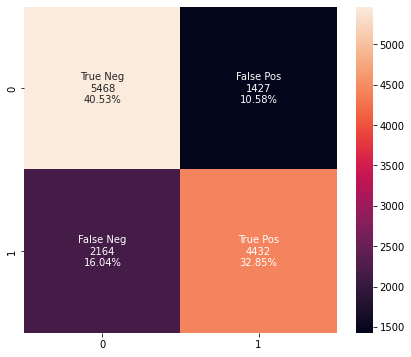

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_logreg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_logreg.flatten()/np.sum(cf_matrix_logreg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
f, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(cf_matrix_logreg, annot=labels, fmt='')

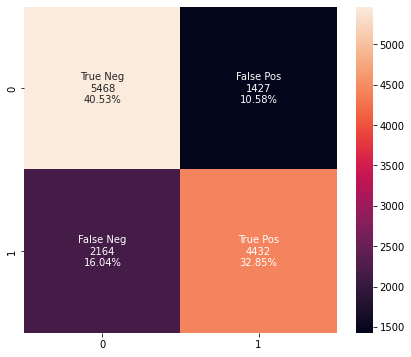

In [ ]:
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_logregcv.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_logregcv.flatten()/np.sum(cf_matrix_logregcv)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
f, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(cf_matrix_logregcv, annot=labels, fmt='')

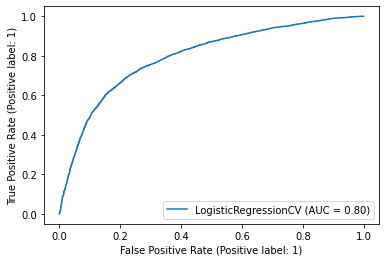

In [ ]:
plot_roc_curve(clf, X_test, y_test)

## SVM

Линейный SVM со стохастическим градиентным спуском

In [ ]:
from sklearn.linear_model import SGDClassifier
simple_svm = SGDClassifier(n_jobs=-1,random_state=10)
simple_svm.fit(X_train,y_train)
svm_pred = simple_svm.predict(X_test)

In [ ]:
print(accuracy_score(y_test,svm_pred),f1_score(y_test, svm_pred))

0.723148765843896 0.6694982744889832


In [ ]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

          -1       0.68      0.87      0.76      6895
           1       0.80      0.57      0.67      6596

    accuracy                           0.72     13491
   macro avg       0.74      0.72      0.72     13491
weighted avg       0.74      0.72      0.72     13491



SVM с rbf ядром на GPU

In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
!ls
!dpkg -i cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
!ls /var/cuda-repo-9-0-local | grep .pub
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!sudo apt-get install cuda-9.0
!pip install thundersvm

--2022-02-15 10:53:33--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.20.126
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.20.126|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/9.0/prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb [following]
--2022-02-15 10:53:33--  https://developer.nvidia.com/compute/cuda/9.0/prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64.deb?aKvixUtmm0THlPeeqXBUtAx-dB-UIbe00dlZ0y8I8MAlOsKVScvafroD6MumLXR4Jd7yg1k4ktnxPaL9k0MCN7fDJIrxJ

In [ ]:
X_train_cat['blood_pressure'][X_train_cat['blood_pressure'] == 'normal'] = 0
X_train_cat['blood_pressure'][X_train_cat['blood_pressure'] == 'under'] =  1
X_train_cat['blood_pressure'][X_train_cat['blood_pressure'] == 'higher'] = 2
X_train_cat['cat_bmi'][X_train_cat['cat_bmi'] == 'healthy'] = 0
X_train_cat['cat_bmi'][X_train_cat['cat_bmi'] == 'under'] = 1
X_train_cat['cat_bmi'][X_train_cat['cat_bmi'] == 'over'] = 2
X_train_cat['cat_bmi'][X_train_cat['cat_bmi'] == 'obese'] = 3
X_test_cat['blood_pressure'][X_test_cat['blood_pressure'] == 'normal'] = 0
X_test_cat['blood_pressure'][X_test_cat['blood_pressure'] == 'under'] =  1
X_test_cat['blood_pressure'][X_test_cat['blood_pressure'] == 'higher'] = 2
X_test_cat['cat_bmi'][X_test_cat['cat_bmi'] == 'healthy'] = 0
X_test_cat['cat_bmi'][X_test_cat['cat_bmi'] == 'under'] = 1
X_test_cat['cat_bmi'][X_test_cat['cat_bmi'] == 'over'] = 2
X_test_cat['cat_bmi'][X_test_cat['cat_bmi'] == 'obese'] = 3

In [ ]:
from thundersvm import SVC
scale = 1/(X_train.shape[1] * X_train.values.var())#дефолтное значение гаммы в sklearn реализации
svm = SVC(random_state=10,gamma=scale,kernel='rbf')
svm.fit(X_train_cat,y_train_cat)
print(accuracy_score(y_test_cat,svm.predict(X_test_cat)),f1_score(y_test_cat, svm.predict(X_test_cat)))
print(classification_report(y_test_cat,svm.predict(X_test_cat)))

Подбор гиперпараметров

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 10, 100],
              'gamma': [scale,0.01],
              'kernel': ['rbf']}
svm_cv = GridSearchCV(svm, param_grid, verbose= 10, scoring='f1',cv=5)
svm_cv.fit(X_train_cat,y_train_cat)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START C=1, gamma=0.11350844203808028, kernel=rbf..................
[CV 1/5; 1/6] END C=1, gamma=0.11350844203808028, kernel=rbf;, score=0.696 total time=   3.4s
[CV 2/5; 1/6] START C=1, gamma=0.11350844203808028, kernel=rbf..................
[CV 2/5; 1/6] END C=1, gamma=0.11350844203808028, kernel=rbf;, score=0.694 total time=   3.2s
[CV 3/5; 1/6] START C=1, gamma=0.11350844203808028, kernel=rbf..................
[CV 3/5; 1/6] END C=1, gamma=0.11350844203808028, kernel=rbf;, score=0.698 total time=   3.4s
[CV 4/5; 1/6] START C=1, gamma=0.11350844203808028, kernel=rbf..................
[CV 4/5; 1/6] END C=1, gamma=0.11350844203808028, kernel=rbf;, score=0.696 total time=   3.1s
[CV 5/5; 1/6] START C=1, gamma=0.11350844203808028, kernel=rbf..................
[CV 5/5; 1/6] END C=1, gamma=0.11350844203808028, kernel=rbf;, score=0.693 total time=   3.1s
[CV 1/5; 2/6] START C=1, gamma=0.01, kernel=rbf..................

GridSearchCV(cv=5,
             estimator=SVC(class_weight={}, gamma=0.11350844203808028,
                           random_state=10),
             param_grid={'C': [1, 10, 100],
                         'gamma': [0.11350844203808028, 0.01],
                         'kernel': ['rbf']},
             scoring='f1', verbose=10)

In [ ]:
svm_cv_pred = svm_cv.best_estimator_.predict(X_test_cat)
svm_cv.best_params_, svm_cv.best_score_

({'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}, 0.699434134652788)

In [ ]:
print(accuracy_score(y_test_cat,svm_cv_pred),f1_score(y_test_cat, svm_cv_pred))
print(classification_report(y_test_cat,svm_cv_pred))

0.7343414127937143 0.7065662354674963
              precision    recall  f1-score   support

          -1       0.71      0.81      0.76      6895
           1       0.77      0.65      0.71      6596

    accuracy                           0.73     13491
   macro avg       0.74      0.73      0.73     13491
weighted avg       0.74      0.73      0.73     13491



In [ ]:
from thundersvm import SVC
scale = 1/(X_train.shape[1] * X_train.values.var())
svm_cv_ = SVC(random_state=10,gamma=0.01,kernel='rbf')
svm_cv_.fit(X_train_cat,y_train_cat)
svm_cv_pred_ = svm_cv_.predict(X_test_cat)
print(accuracy_score(y_test_cat,svm_cv_pred_),f1_score(y_test_cat, svm_cv_pred_))
print(classification_report(y_test_cat,svm_cv_pred_))

0.7343414127937143 0.7065662354674963
              precision    recall  f1-score   support

          -1       0.71      0.81      0.76      6895
           1       0.77      0.65      0.71      6596

    accuracy                           0.73     13491
   macro avg       0.74      0.73      0.73     13491
weighted avg       0.74      0.73      0.73     13491



## K-nearest neighbors

KNN без подобранных гиперпараметров

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs=-1)

In [ ]:
knn.fit(X_train,y_train)
print(accuracy_score(y_test,knn.predict(X_test)), f1_score(y_test, knn.predict(X_test)))
print(classification_report(y_test,knn.predict(X_test)))

0.6943147283374101 0.6834024259173961
              precision    recall  f1-score   support

          -1       0.70      0.71      0.70      6895
           1       0.69      0.67      0.68      6596

    accuracy                           0.69     13491
   macro avg       0.69      0.69      0.69     13491
weighted avg       0.69      0.69      0.69     13491



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'weights':['uniform', 'distance'],
              'p': [1, 2],
              'n_neighbors': [int(x) for x in np.arange(100,201,50)]}
knn_cv = GridSearchCV(knn, param_grid, scoring='f1',verbose=5,cv=5)
knn_cv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END n_neighbors=100, p=1, weights=uniform;, score=0.697 total time=  21.0s
[CV 2/5] END n_neighbors=100, p=1, weights=uniform;, score=0.691 total time=  21.2s
[CV 3/5] END n_neighbors=100, p=1, weights=uniform;, score=0.697 total time=  30.7s
[CV 4/5] END n_neighbors=100, p=1, weights=uniform;, score=0.692 total time=  28.4s
[CV 5/5] END n_neighbors=100, p=1, weights=uniform;, score=0.693 total time=  27.3s
[CV 1/5] END n_neighbors=100, p=1, weights=distance;, score=0.694 total time=  21.0s
[CV 2/5] END n_neighbors=100, p=1, weights=distance;, score=0.690 total time=  20.9s
[CV 3/5] END n_neighbors=100, p=1, weights=distance;, score=0.699 total time=  21.2s
[CV 4/5] END n_neighbors=100, p=1, weights=distance;, score=0.696 total time=  21.4s
[CV 5/5] END n_neighbors=100, p=1, weights=distance;, score=0.691 total time=  21.6s
[CV 1/5] END n_neighbors=100, p=2, weights=uniform;, score=0.698 total time=  17.8s
[CV 2/5] E

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'n_neighbors': [100, 150, 200], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=5)

In [ ]:
knn_cv_pred = knn_cv.best_estimator_.predict(X_test)
knn_cv.best_params_

{'n_neighbors': 100, 'p': 2, 'weights': 'distance'}

KNN с подобранными гиперпараметрами.

In [ ]:
print(accuracy_score(y_test,knn_cv_pred), f1_score(y_test, knn_cv_pred))
print(classification_report(y_test,knn_cv_pred))

0.7238900007412349 0.7047166072136346
              precision    recall  f1-score   support

          -1       0.71      0.77      0.74      6895
           1       0.74      0.67      0.70      6596

    accuracy                           0.72     13491
   macro avg       0.73      0.72      0.72     13491
weighted avg       0.73      0.72      0.72     13491



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_cv = KNeighborsClassifier(n_neighbors= 100, p = 2, weights = 'distance')
knn_cv.fit(X_train,y_train)
knn_cv_pred = knn_cv.predict(X_test)

## Random forest

В случайном лесе я сразу подбирал гиперпараметры перебором по сетке

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params = {'bootstrap': [True],
          'max_depth': [8, None],
          'max_features': ['sqrt',0.5],
          'min_samples_split': [10,50,100],
          'max_samples': [0.7, 0.5],
          'n_estimators': [300]}

random_forest = RandomForestClassifier(random_state=10)
random_forest_cv = GridSearchCV(random_forest, params,cv = 5, scoring = 'f1',verbose=10)
random_forest_cv.fit(X_train_cat,y_train_cat)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300
[CV 1/5; 1/24] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300;, score=0.703 total time=   5.6s
[CV 2/5; 1/24] START bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300
[CV 2/5; 1/24] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300;, score=0.700 total time=   5.4s
[CV 3/5; 1/24] START bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300
[CV 3/5; 1/24] END bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_samples_split=10, n_estimators=300;, score=0.704 total time=   5.3s
[CV 4/5; 1/24] START bootstrap=True, max_depth=8, max_features=sqrt, max_samples=0.7, min_sampl

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'bootstrap': [True], 'max_depth': [8, None],
                         'max_features': ['sqrt', 0.5],
                         'max_samples': [0.7, 0.5],
                         'min_samples_split': [10, 50, 100],
                         'n_estimators': [300]},
             scoring='f1', verbose=10)

In [ ]:
random_forest_pred = random_forest_cv.predict(X_test_cat)
random_forest_cv.best_params_, random_forest_cv.best_score_

({'bootstrap': True,
  'max_depth': None,
  'max_features': 'sqrt',
  'max_samples': 0.7,
  'min_samples_split': 100,
  'n_estimators': 300},
 0.7157281674556588)

In [ ]:
print(accuracy_score(y_test_cat,random_forest_pred), f1_score(y_test_cat, random_forest_cv.predict(X_test_cat)))
print(classification_report(y_test_cat,random_forest_pred))

0.7376028463420058 0.7206439393939393
              precision    recall  f1-score   support

          -1       0.73      0.78      0.75      6895
           1       0.75      0.69      0.72      6596

    accuracy                           0.74     13491
   macro avg       0.74      0.74      0.74     13491
weighted avg       0.74      0.74      0.74     13491



In [ ]:
imp_df = pd.DataFrame(X_train_cat.columns)
imp_df.columns = ['Feature']
imp_df["Importance"] = pd.Series(random_forest_cv.best_estimator_.feature_importances_)

imp_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
5,ap_hi,0.342217
6,ap_lo,0.154195
0,age,0.124755
13,blood_pressure,0.094262
7,cholesterol,0.080977
4,bmi,0.069466
3,weight,0.048824
2,height,0.036661
12,cat_bmi,0.013267
8,gluc,0.012647


Здесь я просто сохранил модель чтобы потом заново не перебирать при перезапуске среды

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(bootstrap = True,
  max_depth = None,
  max_features = 'sqrt',
  max_samples = 0.7,
  min_samples_split = 100,
  n_estimators = 300,
  random_state=10)
random_forest.fit(X_train_cat,y_train_cat)
print(accuracy_score(y_test_cat,random_forest.predict(X_test_cat)), f1_score(y_test_cat, random_forest.predict(X_test_cat)))

## Градиентный бустинг

Для градиентного бустинга параметры тоже подбираю сразу, использую CatBoost.

CatBoost сам кодирует категориальные переменные, поэтому использую данные до one-hot кодирования, их же далее использую в PCA.

In [ ]:
!pip install catboost
import catboost
from catboost import CatBoostClassifier
cat_features = [col for col in X_train_cat.columns if 10 >= len(X_train_cat[col].unique())]

Список категориальных переменных

In [ ]:
cat_features = [col for col in X_train_cat.columns if 10 >= len(X_train_cat[col].unique())]
cat_features

In [ ]:
np.random.seed(10)
c_boost = CatBoostClassifier(eval_metric='F1',
                             verbose=False,
                             early_stopping_rounds=100,
                             cat_features=cat_features,
                             task_type="GPU",
                             iterations = 500,
                             random_seed=10)

parameters = {'depth': [4,6,8,10],
              'learning_rate': [0.1,0.2,0.3],
              'l2_leaf_reg': [0,3,6,1]}

grid_res = c_boost.grid_search(parameters,
                               X_train_cat,
                               y_train_cat,
                               cv=5,
                               partition_random_seed=10,
                               verbose=True)

Лучшие параметры после перебора по сетке

In [ ]:
grid_res['params']

In [ ]:
print(accuracy_score(y_test_cat,c_boost.predict(X_test_cat)), f1_score(y_test_cat, c_boost.predict(X_test_cat)))

Бустинг без подбора гиперпараметров

In [ ]:
np.random.seed(10)
boost = CatBoostClassifier(eval_metric='F1',
                             verbose=False,
                             early_stopping_rounds=100,
                             cat_features=cat_features,
                             task_type="GPU",
                             iterations = 1000,
                             random_seed=10)
boost.fit(X_train_cat,y_train_cat)
print(accuracy_score(y_test_cat,boost.predict(X_test_cat)), f1_score(y_test_cat, boost.predict(X_test_cat)))

Пока самая высокая точность и F-мера

Важность признаков, ROC-кривая и матрица ошибок

In [ ]:
imp_df = pd.DataFrame(X_train_cat.columns)
imp_df.columns = ['Feature']
imp_df["Importance"] = pd.Series(c_boost.get_feature_importance())

imp_df.sort_values(by='Importance', ascending=False)

In [ ]:
plot_roc_curve(c_boost, X_test_cat, y_test_cat)

In [ ]:
cf_matrix_cb = confusion_matrix(y_test_cat,c_boost.predict(X_test_cat))
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_cb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_cb.flatten()/np.sum(cf_matrix_cb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
f, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(cf_matrix_cb, annot=labels, fmt='')

## CHI - PCA

Проверяем категориальные переменные на независимость критерием согласия хи-квадрат

In [ ]:
from scipy.stats import chi2_contingency

alpha = 0.01
columns = ['gender',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']
column_pairs = []
ps = []
verdict = []
for column_1 in range(len(columns)):
  for column_2 in range(column_1+1,len(columns)):
    table = pd.crosstab(df_cat[columns[column_1]],df_cat[columns[column_2]])#попарные кросс-таблицы
    stat, p, dof, expected = chi2_contingency(table)
    column_pairs.append(columns[column_1] + ' and ' + columns[column_2])
    ps.append(p)
    if p <= alpha:
	    verdict.append('Dependent (reject H0)') # нулевая гипотеза - независимость
    else:
	    verdict.append('Independent (fail to reject H0)')

In [ ]:
results=pd.DataFrame(columns=['Columns','p-value','Verdict'])
results['Columns'] = column_pairs
results['p-value'] = ps
results['Verdict'] = verdict
results.sort_values(by='p-value',ascending=False)

,Columns,p-value,Verdict
4,gender and active,1.947045e-01,Independent (fail to reject H0)
5,gender and cardio,8.441783e-02,Independent (fail to reject H0)
19,alco and cardio,1.138139e-02,Independent (fail to reject H0)
13,gluc and active,1.068105e-02,Independent (fail to reject H0)
9,cholesterol and active,1.099308e-03,Dependent (reject H0)
17,smoke and cardio,8.238025e-06,Dependent (reject H0)
1,gender and gluc,5.778089e-07,Dependent (reject H0)
11,gluc and smoke,5.504154e-07,Dependent (reject H0)
7,cholesterol and smoke,3.150642e-09,Dependent (reject H0)
16,smoke and active,2.159756e-10,Dependent (reject H0)


Выкидываем пол и употребление алкоголя - признаки, независимые с целевой переменной.

In [ ]:
X_train_cat_2 = X_train_cat.copy()
X_test_cat_2 = X_test_cat.copy()

In [ ]:
X_train_cat_2.drop(columns=['gender','alco'],inplace=True)
X_test_cat_2.drop(columns=['gender','alco'],inplace=True)

Есть смысл выкинуть рост с весом  и оставить ИМТ

In [ ]:
X_train_cat_2.drop(columns=['height','weight'],inplace=True)
X_test_cat_2.drop(columns=['height','weight'],inplace=True)

Посмотрим сколько в процентах дисперсии данных объясняется различными признками

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_cat_2)
v = pd.DataFrame(X_train_cat_2.columns)
v.columns = ['Feature']
v['Variance explained in %'] = pd.Series(pca.explained_variance_ratio_.round(decimals=6)*100)
v.sort_values(by='Variance explained in %',ascending=False)

Посмотрим какая размерность сохраняет 95% от изначальной дисперсии

In [ ]:
pca_95 = PCA(n_components=0.95)
pca_95.fit(X_train_cat_2)
pca_95.n_components_

In [ ]:
pca_2 = PCA(n_components=2)
X_train_pca_2 = pca_2.fit_transform(X_train_cat_2)
X_test_pca_2 = pca_2.transform(X_test_cat_2)

In [ ]:
X_train_pca = pca_95.fit_transform(X_train_cat_2)
X_test_pca = pca_95.transform(X_test_cat_2)

Посмотрим что получилось после снижения размерности до 2.

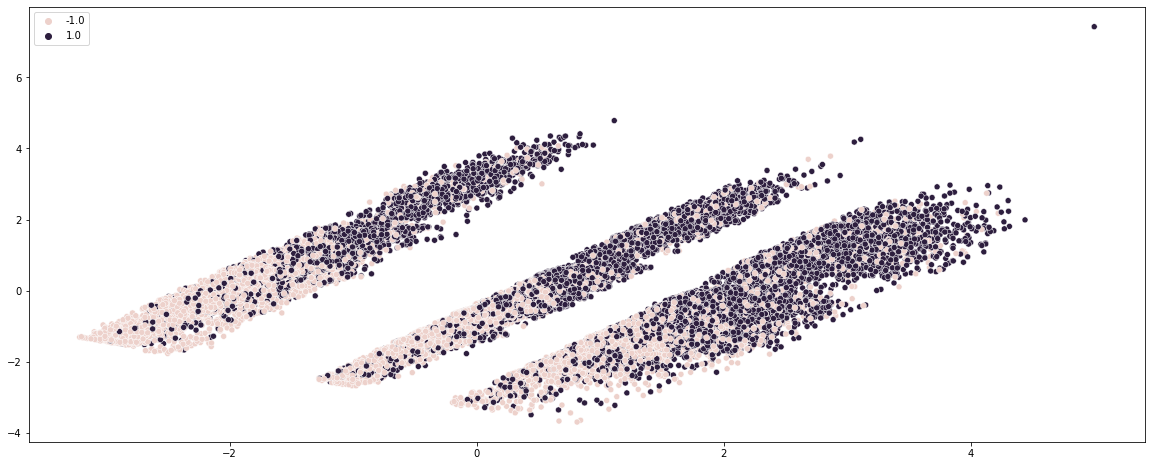

In [ ]:
graph = np.append(X_train_pca_2,y_train_cat.values.reshape(-1,1),axis=1)
f, ax = plt.subplots(figsize=(20, 8))
sns.scatterplot(x=graph[:,0],y=graph[:,1],hue=graph[:,2])

Обучим обычные модели на 8-мерных данных, подбора гиперпараметров тут нет.

In [ ]:
np.random.seed(10)
logreg.fit(X_train_pca,y_train_cat)
print('LogReg accuracy: {0:.2f} % , f1_score : {1:.3f} '.format(accuracy_score(y_test_cat,logreg.predict(X_test_pca)) * 100, f1_score(y_test_cat,logreg.predict(X_test_pca))))
svm_pca = SVC(random_state=10)
svm_pca.fit(X_train_pca,y_train_cat)
print('SVM accuracy: {0:.2f} % , f1_score: {1:.3f} '.format(accuracy_score(y_test_cat,svm_pca.predict(X_test_pca)) * 100, f1_score(y_test_cat,svm_pca.predict(X_test_pca))))
knn.fit(X_train_pca,y_train_cat)
print('KNN accuracy: {0:.2f} % , f1_score: {1:.3f} '.format(accuracy_score(y_test_cat,knn.predict(X_test_pca)) * 100, f1_score(y_test_cat,knn.predict(X_test_pca))))
random_forest_pca = RandomForestClassifier(random_state=10, n_estimators=300,min_samples_split=100,max_features=0.5,max_samples=0.7)
random_forest_pca.fit(X_train_pca,y_train_cat)
print('Random forest accuracy: {0:.2f} % , f1_score: {1:.3f} '.format(accuracy_score(y_test_cat,random_forest_pca.predict(X_test_pca)) * 100, f1_score(y_test_cat,random_forest_pca.predict(X_test_pca))))
c_boost_95 = CatBoostClassifier(verbose=False,eval_metric='F1',task_type="GPU",iterations = 1000,random_seed=10)
c_boost_95.fit(X_train_pca, y_train_cat, verbose=False)
print('Gradient boosting accuracy: {0:.2f} % , f1_score: {1:.3f} '.format(accuracy_score(y_test_cat,c_boost_95.predict(X_test_pca)) * 100, f1_score(y_test_cat,c_boost_95.predict(X_test_pca))))

In [ ]:
c_boost_95 = CatBoostClassifier(verbose=False,eval_metric='F1',task_type="GPU",iterations = 1000,random_seed=10)
c_boost_95.fit(X_train_pca, y_train_cat, verbose=False)

Попробуем обучить svm, random forest и бустинг, выкинув признаки gender, alco, height, weight, cat_bmi, blood_pressure, но не применяя PCA

In [ ]:
X_train_cat_2.drop(columns=['cat_bmi','blood_pressure'],inplace=True)
X_test_cat_2.drop(columns=['cat_bmi','blood_pressure'],inplace=True)

In [ ]:
np.random.seed(10)
cat_features = [col for col in X_train_cat_2.columns if 10 >= len(X_train_cat_2[col].unique())]
c_boost_dropped = CatBoostClassifier(verbose=False,eval_metric='F1',task_type="GPU",iterations = 1000,random_seed=10,cat_features=cat_features)
c_boost_dropped.fit(X_train_cat_2, y_train_cat, verbose=False)

In [ ]:
np.random.seed(10)
cat_features = [col for col in X_train_cat_2.columns if 10 >= len(X_train_cat_2[col].unique())]
c_boost_dropped = CatBoostClassifier(verbose=False,eval_metric='F1',task_type="GPU",iterations = 1000,random_seed=10,cat_features=cat_features)
c_boost_dropped.fit(X_train_cat_2, y_train_cat, verbose=False)
print('Gradient boosting accuracy: {0:.2f} % , f1_score: {1:.3f} '.format(accuracy_score(y_test_cat,c_boost_dropped.predict(X_test_cat_2)) * 100, f1_score(y_test_cat,c_boost_dropped.predict(X_test_cat_2))))
random_forest_dropped = RandomForestClassifier(random_state=10, n_estimators=300,min_samples_split=100,max_features=0.5,max_samples=0.7)
random_forest_dropped.fit(X_train_cat_2,y_train_cat)
print('Random forest accuracy: {0:.2f} % , f1_score: {1:.3f} '.format(accuracy_score(y_test_cat,random_forest_dropped.predict(X_test_cat_2)) * 100, f1_score(y_test_cat,random_forest_dropped.predict(X_test_cat_2))))
svm_dropped = SVC(random_state=10)
svm_dropped.fit(X_train_cat_2,y_train_cat)
print('SVM accuracy: {0:.2f} % , f1_score: {1:.3f} '.format(accuracy_score(y_test_cat,svm_dropped.predict(X_test_cat_2)) * 100, f1_score(y_test_cat,svm_dropped.predict(X_test_cat_2))))

Gradient boosting accuracy: 74.09 % , f1_score: 0.724 
Random forest accuracy: 73.72 % , f1_score: 0.718 
SVM accuracy: 73.57 % , f1_score: 0.710 


Попробуем подобрать гиперпараметры для модели с лучшей оценкой - градиентного бустинга.

In [ ]:
np.random.seed(10)
parameters = {'depth': [4,6,8,10],
          'learning_rate': [0.1,0.2,0.3],
          'l2_leaf_reg': [0, 3, 6,1]}

c_boost_tuned = CatBoostClassifier(eval_metric='F1',
                             verbose=False,
                             early_stopping_rounds=100,
                             task_type="GPU",
                             iterations = 500,
                             random_seed=10)

grid_res_95 = c_boost_tuned.grid_search(parameters,
                               X_train_pca,
                               y_train_cat,
                               cv=5,
                               partition_random_seed = 10,
                               verbose=True)

bestTest = 0.7203960396
bestIteration = 268
0:	loss: 0.7203960	best: 0.7203960 (0)	total: 8.1s	remaining: 6m 20s
bestTest = 0.7203247203
bestIteration = 153
1:	loss: 0.7203247	best: 0.7203960 (0)	total: 14s	remaining: 5m 20s
bestTest = 0.7226493199
bestIteration = 104
2:	loss: 0.7226493	best: 0.7226493 (2)	total: 18.8s	remaining: 4m 42s
bestTest = 0.7220295313
bestIteration = 277
3:	loss: 0.7220295	best: 0.7226493 (2)	total: 27.4s	remaining: 5m 1s
bestTest = 0.7208865143
bestIteration = 83
4:	loss: 0.7208865	best: 0.7226493 (2)	total: 31.8s	remaining: 4m 33s
bestTest = 0.7205042348
bestIteration = 146
5:	loss: 0.7205042	best: 0.7226493 (2)	total: 37.6s	remaining: 4m 23s
bestTest = 0.720119225
bestIteration = 162
6:	loss: 0.7201192	best: 0.7226493 (2)	total: 43.6s	remaining: 4m 15s
bestTest = 0.719857454
bestIteration = 53
7:	loss: 0.7198575	best: 0.7226493 (2)	total: 47.3s	remaining: 3m 56s
bestTest = 0.7207029322
bestIteration = 70
8:	loss: 0.7207029	best: 0.7226493 (2)	total: 51.3s	r

In [ ]:
grid_res_95['params']

{'depth': 8, 'l2_leaf_reg': 3, 'learning_rate': 0.1}

In [ ]:
print('Tuned Gradient boosting accuracy: {0:.2f} % , f1_score: {1:.3f} '.format(accuracy_score(y_test_cat,c_boost_tuned.predict(X_test_pca)) * 100, f1_score(y_test_cat,c_boost_tuned.predict(X_test_pca))))

Tuned Gradient boosting accuracy: 73.10 % , f1_score: 0.714 


# Итоги

Сравним метрики различных моделей на тестовой выборке

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

classifiers = {
    'Logistic Regression' : clf.predict_proba(X_test)[:,1],
    'SVM' : svm.predict(X_test_cat),
    'K-nearest Neighbors' : knn_cv.predict(X_test),
    'Random Forest' : random_forest.predict_proba(X_test_cat)[:,1],
    'CatBoost' : boost.predict_proba(X_test_cat)[:,1],
    'PCA Logistic Regression': logreg.predict_proba(X_test_pca)[:,1],
    'PCA SVM': svm_pca.predict(X_test_pca),
    'PCA K-nearest Neighbors': knn.predict(X_test_pca),
    'PCA Random Forest': random_forest_pca.predict_proba(X_test_pca)[:,1],
    'PCA CatBoost': c_boost_95.predict_proba(X_test_pca)[:,1],
    'Tuned PCA CatBoost': c_boost_tuned.predict_proba(X_test_pca)[:,1],
    'Dropped CatBoost' : c_boost_dropped.predict_proba(X_test_cat_2)[:,1],
    'Dropped Random Forest' : random_forest_dropped.predict_proba(X_test_cat_2)[:,1],
    'Dropped SVM' : svm_dropped.predict(X_test_cat_2)
}
results=pd.DataFrame(columns=['Accuracy in %','ROC-AUC','F1-score','Precision','Recall'])

In [ ]:
for method,pred in classifiers.items():
    pred_ = pred.round() # для метрик коорые не принимают вероятность принадлежности к классу приводим результат к бинарным значениям
    pred_[pred_==0] = -1
    results.loc[method]= [100*np.round(accuracy_score(y_test,pred_),decimals=4),
                         round(roc_auc_score(y_test,pred),3),
                          round(f1_score(y_test,pred_),3),
                          round(precision_score(y_test,pred_),3),
                          round(recall_score(y_test,pred_),3)]
results.sort_values(by=['F1-score','Accuracy in %'],ascending=False).style.highlight_max()

,Accuracy in %,ROC-AUC,F1-score,Precision,Recall
Dropped CatBoost,74.090000,0.806000,0.724000,0.755000,0.696000
CatBoost,74.020000,0.806000,0.724000,0.752000,0.698000
PCA CatBoost,73.810000,0.802000,0.722000,0.751000,0.695000
Random Forest,73.760000,0.805000,0.721000,0.751000,0.692000
PCA Random Forest,73.440000,0.800000,0.719000,0.744000,0.696000
Dropped Random Forest,73.720000,0.804000,0.718000,0.755000,0.685000
Tuned PCA CatBoost,73.100000,0.796000,0.714000,0.744000,0.685000
Logistic Regression,73.380000,0.796000,0.712000,0.756000,0.672000
Dropped SVM,73.570000,0.734000,0.710000,0.766000,0.662000
PCA SVM,73.530000,0.734000,0.709000,0.766000,0.660000


Лучший результат в целом дает бустинг с выкидыванием признаков. Ниже приведена важность признаков для двух интерпритируемых моделей из топ 3 - бустинга с удалением признаков и без.

In [ ]:
imp_dcb = pd.DataFrame(X_train_cat_2.columns)
imp_dcb.columns = ['Feature']
imp_dcb["Importance"] = pd.Series(c_boost_dropped.get_feature_importance())

imp_cb = pd.DataFrame(X_train_cat.columns)
imp_cb.columns = ['Feature']
imp_cb["Importance"] = pd.Series(boost.get_feature_importance())

imp_dcb.sort_values(by='Importance', ascending=False)

,Feature,Importance
2,ap_hi,34.668040
0,age,20.964033
4,cholesterol,14.123693
1,bmi,12.415590
3,ap_lo,6.959925
5,gluc,4.838314
7,active,3.405416
6,smoke,2.624990


In [ ]:
imp_cb.sort_values(by='Importance', ascending=False)

,Feature,Importance
5,ap_hi,29.628430
0,age,19.677593
7,cholesterol,12.331577
4,bmi,7.765726
3,weight,6.068187
6,ap_lo,5.562351
2,height,5.546132
8,gluc,3.902129
11,active,2.564724
13,blood_pressure,1.591649


# Ансамбль

In [ ]:
class VotingClassifier():
  def __init__(self, classifiers, weights=None,voting = 'hard'):

        self.classifiers = classifiers
        self.voting = voting
        self.weights = weights

  def fit(self, x, y): #если надо переучивать
      
        self.x_train = x
        self.y_train = y
        for i in range(len(self.classifiers)):
          self.classifiers[i].fit(x[i],y[i])
        return self
        
  def predict(self, x):
        
        if self.voting == 'soft':
          pred_proba = np.asarray([classifier.predict_proba(X)[:,1] for classifier, X in zip(self.classifiers, x)])
          pred = np.sign(np.average(pred_proba, axis=0, weights = self.weights))
        elif self.voting == 'hard':
          pred_ = np.asarray([classifier.predict(X) for classifier, X in zip(self.classifiers, x)])
          pred = np.sign(np.average(pred_, axis=0, weights = self.weights))
        return pred

Возьмем топ 3

In [ ]:
top_classifiers = [c_boost_dropped,boost,c_boost_95]
test_sets = [X_test_cat_2,X_test_cat,X_test_pca]

In [ ]:
hard_vc = VotingClassifier(top_classifiers)
hard_pred = hard_vc.predict(test_sets)
print('Hard vote ensemble accuracy: {0:.2f} % , f1_score: {1:.3f} '.format(accuracy_score(y_test,hard_pred) * 100, f1_score(y_test,hard_pred)))

Hard vote ensemble accuracy: 74.15 % , f1_score: 0.725 


In [ ]:
soft_vc = VotingClassifier(top_classifiers,voting='soft')
soft_pred = hard_vc.predict(test_sets)
print('Soft vote ensemble accuracy: {0:.2f} % , f1_score: {1:.3f} '.format(accuracy_score(y_test,soft_pred) * 100, f1_score(y_test,soft_pred)))

Soft vote ensemble accuracy: 74.15 % , f1_score: 0.725 


In [ ]:
classifiers['Hard vote ensemble'] = hard_pred
for method,pred in classifiers.items():
    pred_ = pred.round() # для метрик коорые не принимают вероятность принадлежности к классу приводим результат к бинарным значениям
    pred_[pred_==0] = -1
    results.loc[method]= [100*np.round(accuracy_score(y_test,pred_),decimals=4),
                         round(roc_auc_score(y_test,pred),3),
                          round(f1_score(y_test,pred_),3),
                          round(precision_score(y_test,pred_),3),
                          round(recall_score(y_test,pred_),3)]
results.sort_values(by=['F1-score','Accuracy in %'],ascending=False).style.highlight_max()

,Accuracy in %,ROC-AUC,F1-score,Precision,Recall
Hard vote ensemble,74.150000,0.741000,0.725000,0.755000,0.697000
Dropped CatBoost,74.090000,0.806000,0.724000,0.755000,0.696000
CatBoost,74.020000,0.806000,0.724000,0.752000,0.698000
PCA CatBoost,73.810000,0.802000,0.722000,0.751000,0.695000
Random Forest,73.760000,0.805000,0.721000,0.751000,0.692000
PCA Random Forest,73.440000,0.800000,0.719000,0.744000,0.696000
Dropped Random Forest,73.720000,0.804000,0.718000,0.755000,0.685000
Tuned PCA CatBoost,73.100000,0.796000,0.714000,0.744000,0.685000
Logistic Regression,73.380000,0.796000,0.712000,0.756000,0.672000
Dropped SVM,73.570000,0.734000,0.710000,0.766000,0.662000


# Тест Уилкоксона для сравнения моделей

Обучим топ 5 моделей (из оценки на отложенной выборке) на 10 фолдах из всей выборки и сравним точность и f-меры моделей с ансамблем.

In [ ]:
y = y_train.append(y_test)
X_cat = X_train_cat.append(X_test_cat)
X_cat_2 = X_train_cat_2.append(X_test_cat_2)
X_pca = np.append(X_train_pca,X_test_pca,axis=0)

In [ ]:
from sklearn.model_selection import KFold
accuracies = []
f1_scores = []
cv = KFold(n_splits=10)

In [ ]:
for train_index, test_index in cv.split(X_cat):
  X_train_kfolds_cat, X_test_kfolds_cat = X_cat.iloc[train_index], X_cat.iloc[test_index]
  y_train_kfolds, y_test_kfolds = y.iloc[train_index], y.iloc[test_index]
  boost.fit(X_train_kfolds_cat,y_train_kfolds)#обычный бустинг
  pred = boost.predict(X_test_kfolds_cat)
  accuracies.append(accuracy_score(y_test_kfolds,pred))
  f1_scores.append(f1_score(y_test_kfolds,pred))
  X_train_kfolds_dropped, X_test_kfolds_dropped = X_cat_2.iloc[train_index], X_cat_2.iloc[test_index]
  c_boost_dropped.fit(X_train_kfolds_dropped,y_train_kfolds)#бустинг после исключения признаков
  pred = c_boost_dropped.predict(X_test_kfolds_dropped)
  accuracies.append(accuracy_score(y_test_kfolds,pred))
  f1_scores.append(f1_score(y_test_kfolds,pred))
  X_train_kfolds_pca, X_test_kfolds_pca = X_pca[train_index], X_pca[test_index]
  c_boost_95.fit(X_train_kfolds_pca,y_train_kfolds)#бустинг после PCA
  pred = c_boost_95.predict(X_test_kfolds_pca)
  accuracies.append(accuracy_score(y_test_kfolds,pred))
  f1_scores.append(f1_score(y_test_kfolds,pred))
  random_forest.fit(X_train_kfolds_cat,y_train_kfolds)#обычный RandomForest
  pred = random_forest.predict(X_test_kfolds_cat)
  accuracies.append(accuracy_score(y_test_kfolds,pred))
  f1_scores.append(f1_score(y_test_kfolds,pred))
  test_sets_kfolds = [X_test_kfolds_dropped,X_test_kfolds_cat,X_test_kfolds_pca]
  top_classifiers = [c_boost_dropped,boost,c_boost_95]
  hard_vc = VotingClassifier(top_classifiers)#ансамбль
  pred = hard_vc.predict(test_sets_kfolds)
  accuracies.append(accuracy_score(y_test_kfolds,pred))
  f1_scores.append(f1_score(y_test_kfolds,pred))

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

In [ ]:
accuracies = np.asarray(accuracies)
f1_scores = np.asarray(f1_scores)

In [ ]:
accuracies = accuracies.reshape(10,5)
f1_scores = f1_scores.reshape(10,5)

Тест для точности

In [ ]:
from scipy.stats import wilcoxon

alpha = 0.05
names = ['Catboost','Dropped Catboost','PCA Catboost', 'RandomForest','Ensemble']
pairs = []
ps = []
verdict = []
for column in range(len(names)-1):
  stat, p = wilcoxon(accuracies[:,column],accuracies[:,4])
  pairs.append(names[column])
  ps.append(p)
  if p <= alpha:
	  verdict.append('Different distribution (reject H0)') # нулевая гипотеза - модели не отличаются
  else:
	  verdict.append('Same distribution (fail to reject H0)')
     
results=pd.DataFrame(columns=['Models','p-value','Verdict (accuracy)'])
results['Models'] = pairs
results['p-value'] = ps
results['Verdict (accuracy)'] = verdict
results.sort_values(by='p-value',ascending=True)

,Models,p-value,Verdict (accuracy)
2,PCA Catboost,0.006910,Different distribution (reject H0)
3,RandomForest,0.015156,Different distribution (reject H0)
1,Dropped Catboost,0.212720,Same distribution (fail to reject H0)
0,Catboost,0.918707,Same distribution (fail to reject H0)


Тест для F-меры

In [ ]:
alpha = 0.05
names = ['Catboost','Dropped Catboost','PCA Catboost', 'RandomForest','Ensemble']
pairs = []
ps = []
verdict = []
for column in range(len(names)-1):
  stat, p = wilcoxon(f1_scores[:,column],f1_scores[:,4])
  pairs.append(names[column])
  ps.append(p)
  if p <= alpha:
	  verdict.append('Different distribution (reject H0)') # нулевая гипотеза - модели не отличаются
  else:
	  verdict.append('Same distribution (fail to reject H0)')
     
results=pd.DataFrame(columns=['Models','p-value','Verdict (f1_score)'])
results['Models'] = pairs
results['p-value'] = ps
results['Verdict (f1_score)'] = verdict
results.sort_values(by='p-value',ascending=True)

,Models,p-value,Verdict (f1_score)
2,PCA Catboost,0.006910,Different distribution (reject H0)
1,Dropped Catboost,0.021824,Different distribution (reject H0)
3,RandomForest,0.028402,Different distribution (reject H0)
0,Catboost,0.507624,Same distribution (fail to reject H0)


Точность

In [ ]:
results=pd.DataFrame(index=names,columns=['Mean Accuracy +- std'])
results.loc['Catboost'] = str(round(accuracies[:,0].mean()*100,2)) + ' +- ' + str(round(accuracies[:,0].std()*100,2))
results.loc['Dropped Catboost'] = str(round(accuracies[:,1].mean()*100,2)) + ' +- ' + str(round(accuracies[:,0].std()*100,2))
results.loc['PCA Catboost'] = str(round(accuracies[:,2].mean()*100,2)) + ' +- ' + str(round(accuracies[:,0].std()*100,2))
results.loc['RandomForest'] = str(round(accuracies[:,3].mean()*100,2)) + ' +- ' + str(round(accuracies[:,0].std()*100,2))
results.loc['Ensemble'] = str(round(accuracies[:,4].mean()*100,2)) + ' +- ' + str(round(accuracies[:,0].std()*100,2))
results

,Mean Accuracy +- std
Catboost,73.46 +- 0.49
Dropped Catboost,73.45 +- 0.49
PCA Catboost,73.19 +- 0.49
RandomForest,73.31 +- 0.49
Ensemble,73.48 +- 0.49


F-мера

In [ ]:
results=pd.DataFrame(index=names,columns=['Mean f1_score +- std'])
results.loc['Catboost'] = str(round(f1_scores[:,0].mean(),3)) + ' +- ' + str(round(f1_scores[:,0].std(),3))
results.loc['Dropped Catboost'] = str(round(f1_scores[:,1].mean(),3)) + ' +- ' + str(round(f1_scores[:,0].std(),3))
results.loc['PCA Catboost'] = str(round(f1_scores[:,2].mean(),3)) + ' +- ' + str(round(f1_scores[:,0].std(),3))
results.loc['RandomForest'] = str(round(f1_scores[:,3].mean(),3)) + ' +- ' + str(round(f1_scores[:,0].std(),3))
results.loc['Ensemble'] = str(round(f1_scores[:,4].mean(),3)) + ' +- ' + str(round(f1_scores[:,0].std(),3))
results

,Mean f1_score +- std
Catboost,0.718 +- 0.006
Dropped Catboost,0.717 +- 0.006
PCA Catboost,0.715 +- 0.006
RandomForest,0.716 +- 0.006
Ensemble,0.718 +- 0.006


Тест AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier(random_state=10,n_estimators=500,base_estimator=DecisionTreeClassifier(max_depth=1,random_state=10),learning_rate=0.1)
ada.fit(X_train,y_train)
adapred = ada.predict(X_test)
print('Adaboost accuracy: {0:.2f} % , f1_score: {1:.3f} '.format(accuracy_score(y_test,adapred) * 100, f1_score(y_test,adapred)))

Adaboost accuracy: 73.40 % , f1_score: 0.706 


In [ ]:
ada.fit(X_train_cat,y_train)
adapred = ada.predict(X_test_cat)
print('Adaboost accuracy: {0:.2f} % , f1_score: {1:.3f} '.format(accuracy_score(y_test,adapred) * 100, f1_score(y_test,adapred)))

Adaboost accuracy: 73.40 % , f1_score: 0.706 


In [ ]:
ada.fit(X_train_cat_2,y_train)
adapred = ada.predict(X_test_cat_2)
print('Adaboost accuracy: {0:.2f} % , f1_score: {1:.3f} '.format(accuracy_score(y_test,adapred) * 100, f1_score(y_test,adapred)))

Adaboost accuracy: 73.32 % , f1_score: 0.705 
